In [1]:
import numpy as np
import pandas as pd
import keras

Using TensorFlow backend.


# Importing Data

In [2]:
BBB_Train = pd.read_csv("BBB_LSTM_Input_Train.csv", index_col=0)
DDD_Train = pd.read_csv("DDD_LSTM_Input_Train.csv", index_col=0)
FFF_Train = pd.read_csv("FFF_LSTM_Input_Train.csv", index_col=0)

BBB_Test = pd.read_csv("BBB_LSTM_Input_Test.csv", index_col=0)
DDD_Test = pd.read_csv("DDD_LSTM_Input_Test.csv", index_col=0)
FFF_Test = pd.read_csv("FFF_LSTM_Input_Test.csv", index_col=0)

# Transforming Data

#### Normalize variables for every course  per semester

In [3]:
BBB_Train.head()

,id_student,code_presentation,Decile,Avg_Clicks,Asgmts,Avg_Asgmt_Score,final_result
1,1008675,2013B,0,2.181818,0,0.000000,Pass
2,1008675,2013B,1,12.391304,1,70.000000,Pass
4,1008675,2013B,2,12.875000,1,65.000000,Pass
5,1008675,2013B,3,7.250000,1,56.666667,Pass
6,1008675,2013B,4,5.166667,1,55.250000,Pass


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
Semesters_Train = BBB_Train.code_presentation.unique()
dfs_Train = list([BBB_Train, DDD_Train, FFF_Train])
Semesters_Test = BBB_Test.code_presentation.unique()
dfs_Test = list([BBB_Test, DDD_Test, FFF_Test])

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))

for i in range(0,len(dfs_Train)):
    for j in range(0,len(Semesters_Train)):
        scaler.fit(dfs_Train[i].loc[dfs_Train[i]["code_presentation"]==Semesters_Train[j], "Avg_Clicks":"Avg_Asgmt_Score"])
        dfs_Train[i].loc[dfs_Train[i]["code_presentation"]==Semesters_Train[j], "Avg_Clicks":"Avg_Asgmt_Score"] = scaler.transform(dfs_Train[i].loc[dfs_Train[i]["code_presentation"]==Semesters_Train[j], "Avg_Clicks":"Avg_Asgmt_Score"])


for i in range(0,len(dfs_Test)):
    for j in range(0,len(Semesters_Test)):
        scaler.fit(dfs_Test[i].loc[dfs_Test[i]["code_presentation"]==Semesters_Test[j], "Avg_Clicks":"Avg_Asgmt_Score"])
        dfs_Test[i].loc[dfs_Test[i]["code_presentation"]==Semesters_Test[j], "Avg_Clicks":"Avg_Asgmt_Score"] = scaler.transform(dfs_Test[i].loc[dfs_Test[i]["code_presentation"]==Semesters_Test[j], "Avg_Clicks":"Avg_Asgmt_Score"])

In [7]:
BBB_Train.head()

,id_student,code_presentation,Decile,Avg_Clicks,Asgmts,Avg_Asgmt_Score,final_result
1,1008675,2013B,0,0.019416,0.000000,0.000000,Pass
2,1008675,2013B,1,0.110267,0.142857,0.700000,Pass
4,1008675,2013B,2,0.114572,0.142857,0.650000,Pass
5,1008675,2013B,3,0.064516,0.142857,0.566667,Pass
6,1008675,2013B,4,0.045977,0.142857,0.552500,Pass


#### Make a 1D array of target labels (pass / fail)

In [8]:
BBB_Train_Targets = BBB_Train["final_result"][0::11]
DDD_Train_Targets = DDD_Train["final_result"][0::11]
FFF_Train_Targets = FFF_Train["final_result"][0::11]

BBB_Test_Targets = BBB_Test["final_result"][0::11]
DDD_Test_Targets = DDD_Test["final_result"][0::11]
FFF_Test_Targets = FFF_Test["final_result"][0::11]

In [9]:
BBB_Train_Targets_1D = np.array(BBB_Train_Targets)
DDD_Train_Targets_1D = np.array(DDD_Train_Targets)
FFF_Train_Targets_1D = np.array(FFF_Train_Targets)

BBB_Test_Targets_1D = np.array(BBB_Test_Targets)
DDD_Test_Targets_1D = np.array(DDD_Test_Targets)
FFF_Test_Targets_1D = np.array(FFF_Test_Targets)


#### Make binary target labels in which "distinction" is considered "pass"

In [10]:
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Fail"] = 0
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Pass"] = 1
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Distinction"] = 1

DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Fail"] = 0
DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Pass"] = 1
DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Distinction"] = 1

FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Fail"] = 0
FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Pass"] = 1
FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Distinction"] = 1

BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Fail"] = 0
BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Pass"] = 1
BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Distinction"] = 1

DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Fail"] = 0
DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Pass"] = 1
DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Distinction"] = 1

FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Fail"] = 0
FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Pass"] = 1
FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Distinction"] = 1

In [11]:
BBB_Train_Targets_1D = BBB_Train_Targets_1D.astype('int64')
DDD_Train_Targets_1D = DDD_Train_Targets_1D.astype('int64')
FFF_Train_Targets_1D = FFF_Train_Targets_1D.astype('int64')

BBB_Test_Targets_1D = BBB_Test_Targets_1D.astype('int64')
DDD_Test_Targets_1D = DDD_Test_Targets_1D.astype('int64')
FFF_Test_Targets_1D = FFF_Test_Targets_1D.astype('int64')

In [12]:
print(FFF_Train_Targets_1D.shape)

(3849,)


In [13]:
FFF_Train_Targets_1D

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

#### Keep only the relevant variables to use as input for the LSTM model (cut out course, semester, id and decile)

In [14]:
BBB_Train_df = BBB_Train.iloc[:,3:6]
DDD_Train_df = DDD_Train.iloc[:,3:6]
FFF_Train_df = FFF_Train.iloc[:,3:6]

BBB_Test_df = BBB_Test.iloc[:,3:6]
DDD_Test_df = DDD_Test.iloc[:,3:6]
FFF_Test_df = FFF_Test.iloc[:,3:6]

In [15]:
FFF_Train_df.head(n=20)

,Avg_Clicks,Asgmts,Avg_Asgmt_Score
104974,0.010130,0.000,0.000000
104975,0.109139,0.125,0.700000
104977,0.003323,0.000,0.700000
104978,0.003323,0.000,0.700000
104979,0.032648,0.000,0.700000
104980,0.005669,0.125,0.490000
104981,0.000000,0.000,0.490000
104982,0.000000,0.000,0.490000
104983,0.000000,0.000,0.490000
104984,0.000000,0.000,0.490000


Number of students in the courses across all 4 semesters

In [16]:
print("BBB Train\n")
print(BBB_Train_df.count()/11,"\n")

print("DDD Train\n")
print(DDD_Train_df.count()/11,"\n")

print("FFF Train\n")
print(FFF_Train_df.count()/11,"\n")

print("BBB Test\n")
print(BBB_Test_df.count()/11,"\n")

print("DDD Test\n")
print(DDD_Test_df.count()/11,"\n")

print("FFF Test\n")
print(FFF_Test_df.count()/11,"\n")

BBB Train

Avg_Clicks         3978.0
Asgmts             3978.0
Avg_Asgmt_Score    3978.0
dtype: float64 

DDD Train

Avg_Clicks         2866.0
Asgmts             2866.0
Avg_Asgmt_Score    2866.0
dtype: float64 

FFF Train

Avg_Clicks         3849.0
Asgmts             3849.0
Avg_Asgmt_Score    3849.0
dtype: float64 

BBB Test

Avg_Clicks         1543.0
Asgmts             1543.0
Avg_Asgmt_Score    1543.0
dtype: float64 

DDD Test

Avg_Clicks         1156.0
Asgmts             1156.0
Avg_Asgmt_Score    1156.0
dtype: float64 

FFF Test

Avg_Clicks         1510.0
Asgmts             1510.0
Avg_Asgmt_Score    1510.0
dtype: float64 



#### Convert dataframes into 2D arrays

In [17]:
BBB_Train_2D = BBB_Train_df.values
DDD_Train_2D = DDD_Train_df.values
FFF_Train_2D = FFF_Train_df.values

BBB_Test_2D = BBB_Test_df.values
DDD_Test_2D = DDD_Test_df.values
FFF_Test_2D = FFF_Test_df.values

#### Reshape 2D arrays to 3D arrays
Format : samples (students), timesteps (deciles), features (clicks & assignments)

In [18]:
BBB_Train_3D = BBB_Train_2D.reshape(int(BBB_Train_df["Avg_Clicks"].count()/11),11,len(BBB_Train_df.columns))
DDD_Train_3D = DDD_Train_2D.reshape(int(DDD_Train_df["Avg_Clicks"].count()/11),11,len(DDD_Train_df.columns))
FFF_Train_3D = FFF_Train_2D.reshape(int(FFF_Train_df["Avg_Clicks"].count()/11),11,len(FFF_Train_df.columns))

BBB_Test_3D = BBB_Test_2D.reshape(int(BBB_Test_df["Avg_Clicks"].count()/11),11,len(BBB_Test_df.columns))
DDD_Test_3D = DDD_Test_2D.reshape(int(DDD_Test_df["Avg_Clicks"].count()/11),11,len(DDD_Test_df.columns))
FFF_Test_3D = FFF_Test_2D.reshape(int(FFF_Test_df["Avg_Clicks"].count()/11),11,len(FFF_Test_df.columns))


In [19]:
print(FFF_Train_3D.shape)

(3849, 11, 3)


#### Exclude timestep(s) in sequences to be able to build the models for multiple points in time

In [20]:
BBB_Train_3D_Decile9 = np.delete(BBB_Train_3D,-1,axis=1)
BBB_Train_3D_Decile8 = np.delete(BBB_Train_3D,np.s_[-2:],axis=1)
BBB_Train_3D_Decile7 = np.delete(BBB_Train_3D,np.s_[-3:],axis=1)
BBB_Train_3D_Decile6 = np.delete(BBB_Train_3D,np.s_[-4:],axis=1)
BBB_Train_3D_Decile5 = np.delete(BBB_Train_3D,np.s_[-5:],axis=1)
BBB_Train_3D_Decile4 = np.delete(BBB_Train_3D,np.s_[-6:],axis=1)
BBB_Train_3D_Decile3 = np.delete(BBB_Train_3D,np.s_[-7:],axis=1)
BBB_Train_3D_Decile2 = np.delete(BBB_Train_3D,np.s_[-8:],axis=1)
BBB_Train_3D_Decile1 = np.delete(BBB_Train_3D,np.s_[-9:],axis=1)
BBB_Train_3D_Decile0 = np.delete(BBB_Train_3D,np.s_[-10:],axis=1)

BBB_Test_3D_Decile9 = np.delete(BBB_Test_3D,-1,axis=1)
BBB_Test_3D_Decile8 = np.delete(BBB_Test_3D,np.s_[-2:],axis=1)
BBB_Test_3D_Decile7 = np.delete(BBB_Test_3D,np.s_[-3:],axis=1)
BBB_Test_3D_Decile6 = np.delete(BBB_Test_3D,np.s_[-4:],axis=1)
BBB_Test_3D_Decile5 = np.delete(BBB_Test_3D,np.s_[-5:],axis=1)
BBB_Test_3D_Decile4 = np.delete(BBB_Test_3D,np.s_[-6:],axis=1)
BBB_Test_3D_Decile3 = np.delete(BBB_Test_3D,np.s_[-7:],axis=1)
BBB_Test_3D_Decile2 = np.delete(BBB_Test_3D,np.s_[-8:],axis=1)
BBB_Test_3D_Decile1 = np.delete(BBB_Test_3D,np.s_[-9:],axis=1)
BBB_Test_3D_Decile0 = np.delete(BBB_Test_3D,np.s_[-10:],axis=1)

In [21]:
DDD_Train_3D_Decile9 = np.delete(DDD_Train_3D,-1,axis=1)
DDD_Train_3D_Decile8 = np.delete(DDD_Train_3D,np.s_[-2:],axis=1)
DDD_Train_3D_Decile7 = np.delete(DDD_Train_3D,np.s_[-3:],axis=1)
DDD_Train_3D_Decile6 = np.delete(DDD_Train_3D,np.s_[-4:],axis=1)
DDD_Train_3D_Decile5 = np.delete(DDD_Train_3D,np.s_[-5:],axis=1)
DDD_Train_3D_Decile4 = np.delete(DDD_Train_3D,np.s_[-6:],axis=1)
DDD_Train_3D_Decile3 = np.delete(DDD_Train_3D,np.s_[-7:],axis=1)
DDD_Train_3D_Decile2 = np.delete(DDD_Train_3D,np.s_[-8:],axis=1)
DDD_Train_3D_Decile1 = np.delete(DDD_Train_3D,np.s_[-9:],axis=1)
DDD_Train_3D_Decile0 = np.delete(DDD_Train_3D,np.s_[-10:],axis=1)

DDD_Test_3D_Decile9 = np.delete(DDD_Test_3D,-1,axis=1)
DDD_Test_3D_Decile8 = np.delete(DDD_Test_3D,np.s_[-2:],axis=1)
DDD_Test_3D_Decile7 = np.delete(DDD_Test_3D,np.s_[-3:],axis=1)
DDD_Test_3D_Decile6 = np.delete(DDD_Test_3D,np.s_[-4:],axis=1)
DDD_Test_3D_Decile5 = np.delete(DDD_Test_3D,np.s_[-5:],axis=1)
DDD_Test_3D_Decile4 = np.delete(DDD_Test_3D,np.s_[-6:],axis=1)
DDD_Test_3D_Decile3 = np.delete(DDD_Test_3D,np.s_[-7:],axis=1)
DDD_Test_3D_Decile2 = np.delete(DDD_Test_3D,np.s_[-8:],axis=1)
DDD_Test_3D_Decile1 = np.delete(DDD_Test_3D,np.s_[-9:],axis=1)
DDD_Test_3D_Decile0 = np.delete(DDD_Test_3D,np.s_[-10:],axis=1)

In [22]:
FFF_Train_3D_Decile9 = np.delete(FFF_Train_3D,-1,axis=1)
FFF_Train_3D_Decile8 = np.delete(FFF_Train_3D,np.s_[-2:],axis=1)
FFF_Train_3D_Decile7 = np.delete(FFF_Train_3D,np.s_[-3:],axis=1)
FFF_Train_3D_Decile6 = np.delete(FFF_Train_3D,np.s_[-4:],axis=1)
FFF_Train_3D_Decile5 = np.delete(FFF_Train_3D,np.s_[-5:],axis=1)
FFF_Train_3D_Decile4 = np.delete(FFF_Train_3D,np.s_[-6:],axis=1)
FFF_Train_3D_Decile3 = np.delete(FFF_Train_3D,np.s_[-7:],axis=1)
FFF_Train_3D_Decile2 = np.delete(FFF_Train_3D,np.s_[-8:],axis=1)
FFF_Train_3D_Decile1 = np.delete(FFF_Train_3D,np.s_[-9:],axis=1)
FFF_Train_3D_Decile0 = np.delete(FFF_Train_3D,np.s_[-10:],axis=1)

FFF_Test_3D_Decile9 = np.delete(FFF_Test_3D,-1,axis=1)
FFF_Test_3D_Decile8 = np.delete(FFF_Test_3D,np.s_[-2:],axis=1)
FFF_Test_3D_Decile7 = np.delete(FFF_Test_3D,np.s_[-3:],axis=1)
FFF_Test_3D_Decile6 = np.delete(FFF_Test_3D,np.s_[-4:],axis=1)
FFF_Test_3D_Decile5 = np.delete(FFF_Test_3D,np.s_[-5:],axis=1)
FFF_Test_3D_Decile4 = np.delete(FFF_Test_3D,np.s_[-6:],axis=1)
FFF_Test_3D_Decile3 = np.delete(FFF_Test_3D,np.s_[-7:],axis=1)
FFF_Test_3D_Decile2 = np.delete(FFF_Test_3D,np.s_[-8:],axis=1)
FFF_Test_3D_Decile1 = np.delete(FFF_Test_3D,np.s_[-9:],axis=1)
FFF_Test_3D_Decile0 = np.delete(FFF_Test_3D,np.s_[-10:],axis=1)

# LSTM

In [23]:
from keras import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from matplotlib import pyplot
np.random.seed(7)
%matplotlib inline  
#np.set_printoptions(threshold=np.nan)

In [26]:
Deciles = np.arange(11)
BBB_model_names = ["modelBBB0", "modelBBB1", "modelBBB2", "modelBBB3", "modelBBB4", "modelBBB5",
                   "modelBBB6", "modelBBB7", "modelBBB8", "modelBBB9", "modelBBB10"]
BBB_names = ["BBB0", "BBB1", "BBB2", "BBB3", "BBB4", "BBB5", "BBB6", "BBB7", "BBB8", "BBB9", "BBB10"]
BBB_Train_set = [BBB_Train_3D_Decile0,BBB_Train_3D_Decile1,BBB_Train_3D_Decile2,BBB_Train_3D_Decile3,BBB_Train_3D_Decile4,
                 BBB_Train_3D_Decile5,BBB_Train_3D_Decile6,BBB_Train_3D_Decile7,BBB_Train_3D_Decile8,BBB_Train_3D_Decile9,
                 BBB_Train_3D]
BBB_Test_set = [BBB_Test_3D_Decile0,BBB_Test_3D_Decile1,BBB_Test_3D_Decile2,BBB_Test_3D_Decile3,BBB_Test_3D_Decile4,
                 BBB_Test_3D_Decile5,BBB_Test_3D_Decile6,BBB_Test_3D_Decile7,BBB_Test_3D_Decile8,BBB_Test_3D_Decile9,
                 BBB_Test_3D]

Fit LSTM Course BBB - 2 Target Classes - Decile0
Train on 3978 samples, validate on 1543 samples
Epoch 1/20
3978/3978 [==============================] - 10s 3ms/step - loss: 0.6456 - acc: 0.6541 - val_loss: 0.5920 - val_acc: 0.7466
Epoch 2/20
3978/3978 [==============================] - 9s 2ms/step - loss: 0.6448 - acc: 0.6541 - val_loss: 0.5842 - val_acc: 0.7466
Epoch 3/20
3978/3978 [==============================] - 9s 2ms/step - loss: 0.6439 - acc: 0.6541 - val_loss: 0.5759 - val_acc: 0.7466
Epoch 4/20
3978/3978 [==============================] - 9s 2ms/step - loss: 0.6427 - acc: 0.6541 - val_loss: 0.5716 - val_acc: 0.7466
Epoch 5/20
3978/3978 [==============================] - 9s 2ms/step - loss: 0.6405 - acc: 0.6546 - val_loss: 0.5919 - val_acc: 0.7466
Epoch 6/20
3978/3978 [==============================] - 9s 2ms/step - loss: 0.6380 - acc: 0.6561 - val_loss: 0.5792 - val_acc: 0.7466
Epoch 7/20
3978/3978 [==============================] - 9s 2ms/step - loss: 0.6374 - acc: 0.6549 -

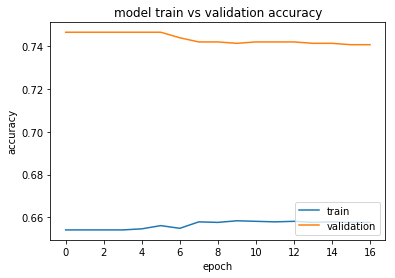

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile0
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.24      0.01      0.02       391
          1       0.75      0.99      0.85      1152

avg / total       0.62      0.74      0.64      1543

Fit LSTM Course BBB - 2 Target Classes - Decile1
Train on 3978 samples, validate on 1543 samples
Epoch 1/20
3978/3978 [==============================] - 12s 3ms/step - loss: 0.6231 - acc: 0.6569 - val_loss: 0.5758 - val_acc: 0.7751
Epoch 2/20
3978/3978 [==============================] - 11s 3ms/step - loss: 0.5717 - acc: 0.7315 - val_loss: 0.6487 - val_acc: 0.5794
Epoch 3/20
3978/3978 [==============================] - 11s 3ms/step - loss: 0.5489 - acc: 0.7381 - val_loss: 0.7411 - val_acc: 0.5787
Epoch 4/20
3978/3978 [==============================] - 11s 3ms/step - loss: 0.5443 - acc: 0.7438 - v

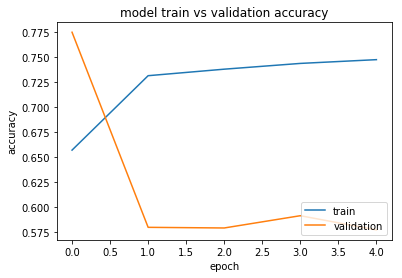

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile1
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.30      0.51      0.38       391
          1       0.78      0.60      0.68      1152

avg / total       0.66      0.58      0.60      1543

Fit LSTM Course BBB - 2 Target Classes - Decile2
Train on 3978 samples, validate on 1543 samples
Epoch 1/20
3978/3978 [==============================] - 13s 3ms/step - loss: 0.6133 - acc: 0.6717 - val_loss: 0.5911 - val_acc: 0.6610
Epoch 2/20
3978/3978 [==============================] - 14s 3ms/step - loss: 0.5374 - acc: 0.7451 - val_loss: 0.6898 - val_acc: 0.6617
Epoch 3/20
3978/3978 [==============================] - 14s 4ms/step - loss: 0.5148 - acc: 0.7521 - val_loss: 0.8602 - val_acc: 0.6513
Epoch 4/20
3978/3978 [==============================] - 14s 4ms/step - loss: 0.5083 - acc: 0.7569 - v

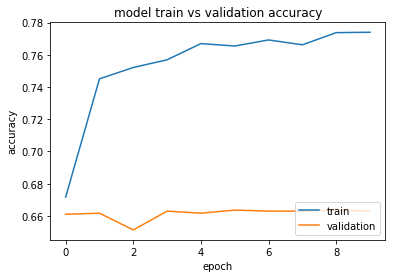

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile2
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.36      0.45      0.40       391
          1       0.80      0.74      0.77      1152

avg / total       0.69      0.66      0.67      1543

Fit LSTM Course BBB - 2 Target Classes - Decile3
Train on 3978 samples, validate on 1543 samples
Epoch 1/20
3978/3978 [==============================] - 14s 4ms/step - loss: 0.6087 - acc: 0.6815 - val_loss: 0.5468 - val_acc: 0.8030
Epoch 2/20
3978/3978 [==============================] - 14s 4ms/step - loss: 0.5234 - acc: 0.7496 - val_loss: 0.7710 - val_acc: 0.5839
Epoch 3/20
3978/3978 [==============================] - 14s 4ms/step - loss: 0.5081 - acc: 0.7650 - val_loss: 0.8350 - val_acc: 0.5872
Epoch 4/20
3978/3978 [==============================] - 14s 4ms/step - loss: 0.5071 - acc: 0.7647 - v

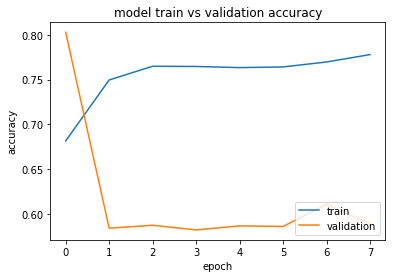

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile3
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.31      0.51      0.39       391
          1       0.79      0.61      0.69      1152

avg / total       0.67      0.59      0.61      1543

Fit LSTM Course BBB - 2 Target Classes - Decile4
Train on 3978 samples, validate on 1543 samples
Epoch 1/20
3978/3978 [==============================] - 17s 4ms/step - loss: 0.5793 - acc: 0.7071 - val_loss: 0.7009 - val_acc: 0.5898
Epoch 2/20
3978/3978 [==============================] - 16s 4ms/step - loss: 0.4746 - acc: 0.7808 - val_loss: 0.8458 - val_acc: 0.5917
Epoch 3/20
3978/3978 [==============================] - 16s 4ms/step - loss: 0.4654 - acc: 0.7898 - val_loss: 0.8484 - val_acc: 0.5995
Epoch 4/20
3978/3978 [==============================] - 16s 4ms/step - loss: 0.4559 - acc: 0.7956 - v

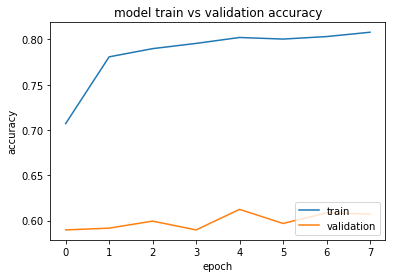

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile4
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.32      0.49      0.39       391
          1       0.79      0.65      0.71      1152

avg / total       0.67      0.61      0.63      1543

Fit LSTM Course BBB - 2 Target Classes - Decile5
Train on 3978 samples, validate on 1543 samples
Epoch 1/20
3978/3978 [==============================] - 19s 5ms/step - loss: 0.5744 - acc: 0.7021 - val_loss: 0.5407 - val_acc: 0.6928
Epoch 2/20
3978/3978 [==============================] - 18s 5ms/step - loss: 0.4676 - acc: 0.7861 - val_loss: 0.7431 - val_acc: 0.6047
Epoch 3/20
3978/3978 [==============================] - 18s 5ms/step - loss: 0.4610 - acc: 0.7888 - val_loss: 0.8615 - val_acc: 0.5969
Epoch 4/20
3978/3978 [==============================] - 18s 5ms/step - loss: 0.4543 - acc: 0.7936 - v

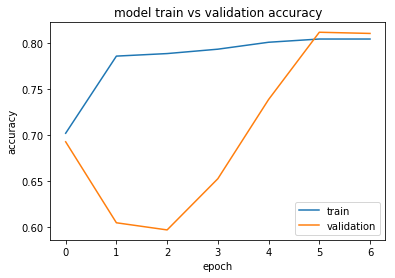

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile5
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.79      0.34      0.48       391
          1       0.81      0.97      0.88      1152

avg / total       0.81      0.81      0.78      1543

Fit LSTM Course BBB - 2 Target Classes - Decile6
Train on 3978 samples, validate on 1543 samples
Epoch 1/20
3978/3978 [==============================] - 21s 5ms/step - loss: 0.5547 - acc: 0.7192 - val_loss: 0.4744 - val_acc: 0.8146
Epoch 2/20
3978/3978 [==============================] - 22s 5ms/step - loss: 0.4399 - acc: 0.8082 - val_loss: 0.6192 - val_acc: 0.6598
Epoch 3/20
3978/3978 [==============================] - 21s 5ms/step - loss: 0.4355 - acc: 0.8062 - val_loss: 0.5171 - val_acc: 0.7615
Epoch 4/20
3978/3978 [==============================] - 21s 5ms/step - loss: 0.4286 - acc: 0.8145 - v

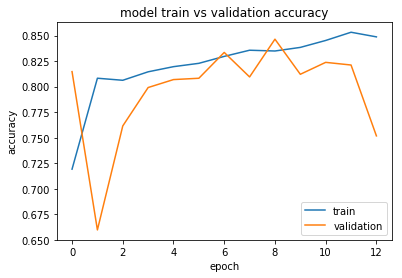

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile6
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.51      0.74      0.60       391
          1       0.89      0.76      0.82      1152

avg / total       0.80      0.75      0.76      1543

Fit LSTM Course BBB - 2 Target Classes - Decile7
Train on 3978 samples, validate on 1543 samples
Epoch 1/20
3978/3978 [==============================] - 22s 6ms/step - loss: 0.5276 - acc: 0.7383 - val_loss: 0.6781 - val_acc: 0.6397
Epoch 2/20
3978/3978 [==============================] - 23s 6ms/step - loss: 0.4089 - acc: 0.8268 - val_loss: 0.5009 - val_acc: 0.7194
Epoch 3/20
3978/3978 [==============================] - 23s 6ms/step - loss: 0.3957 - acc: 0.8374 - val_loss: 0.4212 - val_acc: 0.8166
Epoch 4/20
3978/3978 [==============================] - 20s 5ms/step - loss: 0.3843 - acc: 0.8416 - v

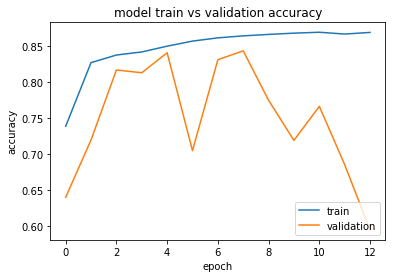

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile7
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.37      0.89      0.53       391
          1       0.93      0.49      0.64      1152

avg / total       0.79      0.59      0.61      1543

Fit LSTM Course BBB - 2 Target Classes - Decile8
Train on 3978 samples, validate on 1543 samples
Epoch 1/20
3978/3978 [==============================] - 26s 6ms/step - loss: 0.5277 - acc: 0.7353 - val_loss: 0.4399 - val_acc: 0.8328
Epoch 2/20
3978/3978 [==============================] - 22s 6ms/step - loss: 0.3969 - acc: 0.8338 - val_loss: 0.3919 - val_acc: 0.8341
Epoch 3/20
3978/3978 [==============================] - 23s 6ms/step - loss: 0.3878 - acc: 0.8401 - val_loss: 0.3617 - val_acc: 0.8425
Epoch 4/20
3978/3978 [==============================] - 27s 7ms/step - loss: 0.3776 - acc: 0.8509 - v

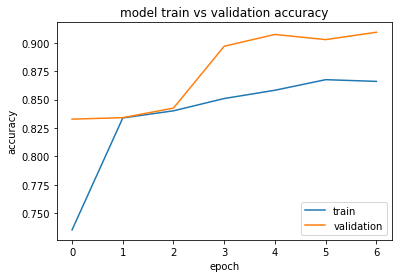

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile8
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.69      0.79       391
          1       0.90      0.98      0.94      1152

avg / total       0.91      0.91      0.90      1543

Fit LSTM Course BBB - 2 Target Classes - Decile9
Train on 3978 samples, validate on 1543 samples
Epoch 1/20
3978/3978 [==============================] - 28s 7ms/step - loss: 0.5206 - acc: 0.7428 - val_loss: 0.4534 - val_acc: 0.8231
Epoch 2/20
3978/3978 [==============================] - 29s 7ms/step - loss: 0.3869 - acc: 0.8311 - val_loss: 0.4264 - val_acc: 0.8458
Epoch 3/20
3978/3978 [==============================] - 27s 7ms/step - loss: 0.3686 - acc: 0.8489 - val_loss: 0.3616 - val_acc: 0.8412
Epoch 4/20
3978/3978 [==============================] - 27s 7ms/step - loss: 0.3551 - acc: 0.8562 - v

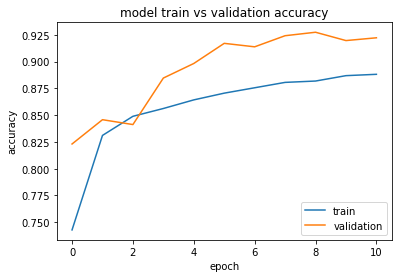

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile9
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.91      0.76      0.83       391
          1       0.92      0.98      0.95      1152

avg / total       0.92      0.92      0.92      1543

Fit LSTM Course BBB - 2 Target Classes - Decile10
Train on 3978 samples, validate on 1543 samples
Epoch 1/20
3978/3978 [==============================] - 28s 7ms/step - loss: 0.5333 - acc: 0.7300 - val_loss: 0.5468 - val_acc: 0.6902
Epoch 2/20
3978/3978 [==============================] - 27s 7ms/step - loss: 0.3982 - acc: 0.8323 - val_loss: 0.4456 - val_acc: 0.8095
Epoch 3/20
3978/3978 [==============================] - 27s 7ms/step - loss: 0.3798 - acc: 0.8406 - val_loss: 0.3905 - val_acc: 0.8172
Epoch 4/20
3978/3978 [==============================] - 27s 7ms/step - loss: 0.3655 - acc: 0.8484 - 

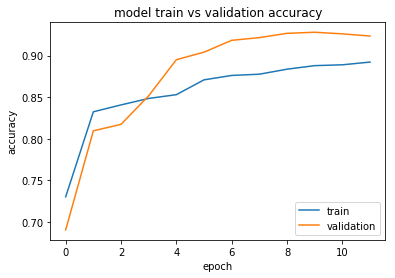

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile10
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.99      0.71      0.82       391
          1       0.91      1.00      0.95      1152

avg / total       0.93      0.92      0.92      1543



In [27]:
for i in Deciles:
    
    # Build model for each timestep

    BBB_model_names[i] = Sequential()
    BBB_model_names[i].add(LSTM(32, input_shape=(i+1,3) , activation='sigmoid'))
    BBB_model_names[i].add(Dense(1, activation='sigmoid'))
    BBB_model_names[i].compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    # Fit model for each timestep
    ES = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto')
    print('Fit LSTM Course BBB - 2 Target Classes - Decile' + str(i))
    history = BBB_model_names[i].fit(BBB_Train_set[i], BBB_Train_Targets_1D, epochs=20, batch_size=1, verbose=1,
                                    validation_data = (BBB_Test_set[i], BBB_Test_Targets_1D), callbacks = [ES])
    
    # plot train vs validation accuracy
    pyplot.plot(history.history['acc'])
    pyplot.plot(history.history['val_acc'])
    pyplot.title('model train vs validation accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'validation'], loc='lower right')
    pyplot.show()
    
    # Test model for each timestep
    print('-------------------------------------------')
    print('Test LSTM Course BBB - 2 Target Classes - Decile' + str(i))
    print('Classification Report for LSTM predictions:')
    print('-------------------------------------------')
    print(classification_report(y_pred=BBB_model_names[i].predict_classes(BBB_Test_set[i]), y_true=BBB_Test_Targets_1D))

## LSTM Course DDD

In [28]:
Deciles = np.arange(11)
DDD_model_names = ["modelDDD0", "modelDDD1", "modelDDD2", "modelDDD3", "modelDDD4", "modelDDD5",
                   "modelDDD6", "modelDDD7", "modelDDD8", "modelDDD9", "modelDDD10"]
DDD_names = ["DDD0", "DDD1", "DDD2", "DDD3", "DDD4", "DDD5", "DDD6", "DDD7", "DDD8", "DDD9", "DDD10"]
DDD_Train_set = [DDD_Train_3D_Decile0,DDD_Train_3D_Decile1,DDD_Train_3D_Decile2,DDD_Train_3D_Decile3,DDD_Train_3D_Decile4,
                 DDD_Train_3D_Decile5,DDD_Train_3D_Decile6,DDD_Train_3D_Decile7,DDD_Train_3D_Decile8,DDD_Train_3D_Decile9,
                 DDD_Train_3D]
DDD_Test_set = [DDD_Test_3D_Decile0,DDD_Test_3D_Decile1,DDD_Test_3D_Decile2,DDD_Test_3D_Decile3,DDD_Test_3D_Decile4,
                 DDD_Test_3D_Decile5,DDD_Test_3D_Decile6,DDD_Test_3D_Decile7,DDD_Test_3D_Decile8,DDD_Test_3D_Decile9,
                 DDD_Test_3D]


Fit LSTM Course DDD - 2 Target Classes - Decile0
Train on 2866 samples, validate on 1156 samples
Epoch 1/25
2866/2866 [==============================] - 15s 5ms/step - loss: 0.6605 - acc: 0.6301 - val_loss: 0.6223 - val_acc: 0.6851
Epoch 2/25
2866/2866 [==============================] - 10s 4ms/step - loss: 0.6595 - acc: 0.6343 - val_loss: 0.6287 - val_acc: 0.6851
Epoch 3/25
2866/2866 [==============================] - 10s 3ms/step - loss: 0.6602 - acc: 0.6343 - val_loss: 0.6217 - val_acc: 0.6851
Epoch 4/25
2866/2866 [==============================] - 11s 4ms/step - loss: 0.6590 - acc: 0.6343 - val_loss: 0.6636 - val_acc: 0.6843
Epoch 5/25
2866/2866 [==============================] - 10s 4ms/step - loss: 0.6605 - acc: 0.6343 - val_loss: 0.6227 - val_acc: 0.6851
Epoch 6/25
2866/2866 [==============================] - 11s 4ms/step - loss: 0.6597 - acc: 0.6343 - val_loss: 0.6239 - val_acc: 0.6851
Epoch 7/25
2866/2866 [==============================] - 10s 4ms/step - loss: 0.6597 - acc: 0.

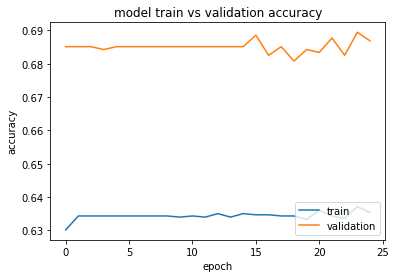

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile0
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.52      0.07      0.12       364
          1       0.69      0.97      0.81       792

avg / total       0.64      0.69      0.59      1156

Fit LSTM Course DDD - 2 Target Classes - Decile1
Train on 2866 samples, validate on 1156 samples
Epoch 1/25
2866/2866 [==============================] - 17s 6ms/step - loss: 0.6424 - acc: 0.6368 - val_loss: 0.6089 - val_acc: 0.6851
Epoch 2/25
2866/2866 [==============================] - 9s 3ms/step - loss: 0.6165 - acc: 0.6361 - val_loss: 0.5921 - val_acc: 0.6851
Epoch 3/25
2866/2866 [==============================] - 10s 4ms/step - loss: 0.6071 - acc: 0.6445 - val_loss: 0.5699 - val_acc: 0.7232
Epoch 4/25
2866/2866 [==============================] - 12s 4ms/step - loss: 0.6040 - acc: 0.6465 - va

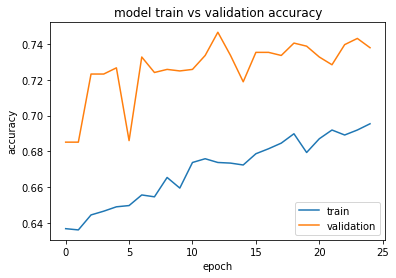

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile1
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.80      0.23      0.35       364
          1       0.73      0.97      0.84       792

avg / total       0.75      0.74      0.68      1156

Fit LSTM Course DDD - 2 Target Classes - Decile2
Train on 2866 samples, validate on 1156 samples
Epoch 1/25
2866/2866 [==============================] - 17s 6ms/step - loss: 0.6291 - acc: 0.6452 - val_loss: 0.5586 - val_acc: 0.7189
Epoch 2/25
2866/2866 [==============================] - 12s 4ms/step - loss: 0.5457 - acc: 0.7415 - val_loss: 0.5207 - val_acc: 0.7483
Epoch 3/25
2866/2866 [==============================] - 12s 4ms/step - loss: 0.5234 - acc: 0.7537 - val_loss: 0.5666 - val_acc: 0.7301
Epoch 4/25
2866/2866 [==============================] - 12s 4ms/step - loss: 0.5102 - acc: 0.7585 - v

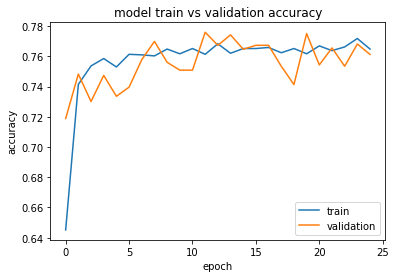

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile2
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.82      0.31      0.45       364
          1       0.75      0.97      0.85       792

avg / total       0.78      0.76      0.72      1156

Fit LSTM Course DDD - 2 Target Classes - Decile3
Train on 2866 samples, validate on 1156 samples
Epoch 1/25
2866/2866 [==============================] - 19s 6ms/step - loss: 0.5999 - acc: 0.6773 - val_loss: 0.5605 - val_acc: 0.7189
Epoch 2/25
2866/2866 [==============================] - 13s 5ms/step - loss: 0.5047 - acc: 0.7617 - val_loss: 0.6472 - val_acc: 0.7240
Epoch 3/25
2866/2866 [==============================] - 14s 5ms/step - loss: 0.4936 - acc: 0.7634 - val_loss: 0.5067 - val_acc: 0.7535
Epoch 4/25
2866/2866 [==============================] - 14s 5ms/step - loss: 0.4850 - acc: 0.7736 - v

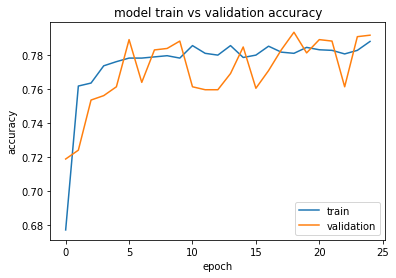

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile3
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.76      0.49      0.60       364
          1       0.80      0.93      0.86       792

avg / total       0.79      0.79      0.78      1156

Fit LSTM Course DDD - 2 Target Classes - Decile4
Train on 2866 samples, validate on 1156 samples
Epoch 1/25
2866/2866 [==============================] - 20s 7ms/step - loss: 0.5874 - acc: 0.6909 - val_loss: 0.5024 - val_acc: 0.7552
Epoch 2/25
2866/2866 [==============================] - 15s 5ms/step - loss: 0.4750 - acc: 0.7749 - val_loss: 0.4868 - val_acc: 0.7734
Epoch 3/25
2866/2866 [==============================] - 15s 5ms/step - loss: 0.4623 - acc: 0.7851 - val_loss: 0.4735 - val_acc: 0.7889
Epoch 4/25
2866/2866 [==============================] - 15s 5ms/step - loss: 0.4538 - acc: 0.7934 - v

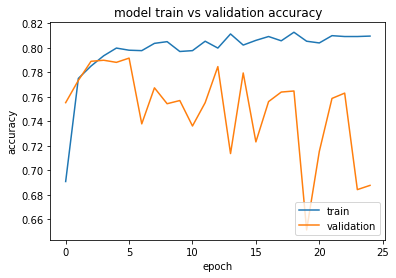

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile4
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.50      0.79      0.62       364
          1       0.87      0.64      0.74       792

avg / total       0.75      0.69      0.70      1156

Fit LSTM Course DDD - 2 Target Classes - Decile5
Train on 2866 samples, validate on 1156 samples
Epoch 1/25
2866/2866 [==============================] - 22s 8ms/step - loss: 0.5677 - acc: 0.7052 - val_loss: 0.4717 - val_acc: 0.7768
Epoch 2/25
2866/2866 [==============================] - 18s 6ms/step - loss: 0.4471 - acc: 0.7868 - val_loss: 0.4507 - val_acc: 0.7976
Epoch 3/25
2866/2866 [==============================] - 18s 6ms/step - loss: 0.4342 - acc: 0.8032 - val_loss: 0.4467 - val_acc: 0.8028
Epoch 4/25
2866/2866 [==============================] - 17s 6ms/step - loss: 0.4238 - acc: 0.8060 - v

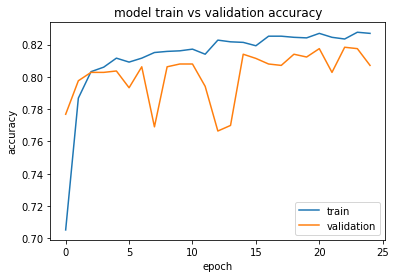

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile5
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.78      0.54      0.64       364
          1       0.82      0.93      0.87       792

avg / total       0.80      0.81      0.80      1156

Fit LSTM Course DDD - 2 Target Classes - Decile6
Train on 2866 samples, validate on 1156 samples
Epoch 1/25
2866/2866 [==============================] - 23s 8ms/step - loss: 0.5789 - acc: 0.7059 - val_loss: 0.4743 - val_acc: 0.7690
Epoch 2/25
2866/2866 [==============================] - 17s 6ms/step - loss: 0.4556 - acc: 0.7756 - val_loss: 0.4430 - val_acc: 0.8028
Epoch 3/25
2866/2866 [==============================] - 17s 6ms/step - loss: 0.4441 - acc: 0.7917 - val_loss: 0.4376 - val_acc: 0.7872
Epoch 4/25
2866/2866 [==============================] - 18s 6ms/step - loss: 0.4319 - acc: 0.8011 - v

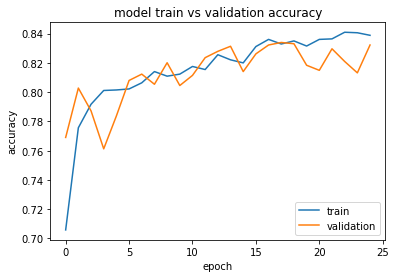

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile6
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.77      0.67      0.72       364
          1       0.86      0.91      0.88       792

avg / total       0.83      0.83      0.83      1156

Fit LSTM Course DDD - 2 Target Classes - Decile7
Train on 2866 samples, validate on 1156 samples
Epoch 1/25
2866/2866 [==============================] - 26s 9ms/step - loss: 0.5453 - acc: 0.7226 - val_loss: 0.4388 - val_acc: 0.8036
Epoch 2/25
2866/2866 [==============================] - 19s 7ms/step - loss: 0.4218 - acc: 0.8032 - val_loss: 0.4369 - val_acc: 0.7898
Epoch 3/25
2866/2866 [==============================] - 19s 7ms/step - loss: 0.4085 - acc: 0.8105 - val_loss: 0.4211 - val_acc: 0.8062
Epoch 4/25
2866/2866 [==============================] - 19s 7ms/step - loss: 0.3977 - acc: 0.8119 - v

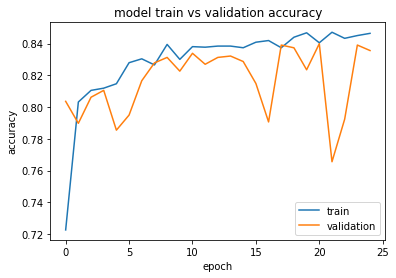

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile7
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.72      0.79      0.75       364
          1       0.90      0.85      0.88       792

avg / total       0.84      0.84      0.84      1156

Fit LSTM Course DDD - 2 Target Classes - Decile8
Train on 2866 samples, validate on 1156 samples
Epoch 1/25
2866/2866 [==============================] - 25s 9ms/step - loss: 0.5492 - acc: 0.7111 - val_loss: 0.4302 - val_acc: 0.7915
Epoch 2/25
2866/2866 [==============================] - 20s 7ms/step - loss: 0.4217 - acc: 0.8018 - val_loss: 0.4890 - val_acc: 0.7777
Epoch 3/25
2866/2866 [==============================] - 21s 7ms/step - loss: 0.4080 - acc: 0.8091 - val_loss: 0.4078 - val_acc: 0.8010
Epoch 4/25
2866/2866 [==============================] - 21s 7ms/step - loss: 0.3975 - acc: 0.8137 - v

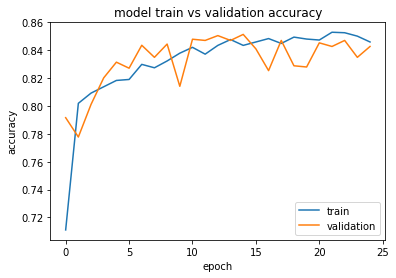

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile8
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.78      0.70      0.74       364
          1       0.87      0.91      0.89       792

avg / total       0.84      0.84      0.84      1156

Fit LSTM Course DDD - 2 Target Classes - Decile9
Train on 2866 samples, validate on 1156 samples
Epoch 1/25
2866/2866 [==============================] - 27s 9ms/step - loss: 0.5503 - acc: 0.7114 - val_loss: 0.4913 - val_acc: 0.7664
Epoch 2/25
2866/2866 [==============================] - 21s 7ms/step - loss: 0.4133 - acc: 0.8001 - val_loss: 0.4218 - val_acc: 0.7967
Epoch 3/25
2866/2866 [==============================] - 22s 8ms/step - loss: 0.4001 - acc: 0.8112 - val_loss: 0.3973 - val_acc: 0.8114
Epoch 4/25
2866/2866 [==============================] - 21s 7ms/step - loss: 0.3878 - acc: 0.8189 - v

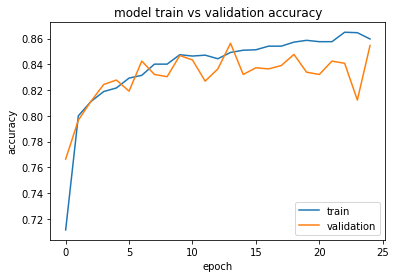

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile9
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.76      0.78      0.77       364
          1       0.90      0.89      0.89       792

avg / total       0.86      0.85      0.85      1156

Fit LSTM Course DDD - 2 Target Classes - Decile10
Train on 2866 samples, validate on 1156 samples
Epoch 1/25
2866/2866 [==============================] - 28s 10ms/step - loss: 0.5129 - acc: 0.7369 - val_loss: 0.4375 - val_acc: 0.7837
Epoch 2/25
2866/2866 [==============================] - 23s 8ms/step - loss: 0.3667 - acc: 0.8245 - val_loss: 0.3525 - val_acc: 0.8356
Epoch 3/25
2866/2866 [==============================] - 23s 8ms/step - loss: 0.3447 - acc: 0.8378 - val_loss: 0.3707 - val_acc: 0.8426
Epoch 4/25
2866/2866 [==============================] - 23s 8ms/step - loss: 0.3280 - acc: 0.8576 -

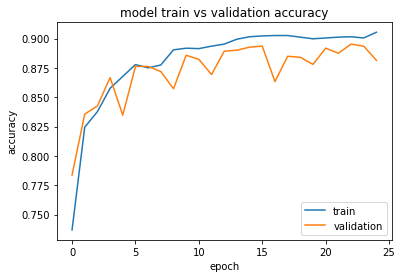

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile10
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.99      0.63      0.77       364
          1       0.85      1.00      0.92       792

avg / total       0.90      0.88      0.87      1156



In [35]:
for i in Deciles:
    
    # Build model for each timestep

    DDD_model_names[i] = Sequential()
    DDD_model_names[i].add(LSTM(32, input_shape=(i+1,3) , activation='sigmoid'))
    DDD_model_names[i].add(Dense(1, activation='sigmoid'))
    DDD_model_names[i].compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    
    # Fit model for each timestep
    #ES = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto')
    print('Fit LSTM Course DDD - 2 Target Classes - Decile' + str(i))
    history = DDD_model_names[i].fit(DDD_Train_set[i], DDD_Train_Targets_1D, epochs=25, batch_size=1, verbose=1,
                                    validation_data = (DDD_Test_set[i], DDD_Test_Targets_1D))
    
    # plot train vs validation accuracy
    pyplot.plot(history.history['acc'])
    pyplot.plot(history.history['val_acc'])
    pyplot.title('model train vs validation accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'validation'], loc='lower right')
    pyplot.show()
    
    # Test model for each timestep
    print('-------------------------------------------')
    print('Test LSTM Course DDD - 2 Target Classes - Decile' + str(i))
    print('Classification Report for LSTM predictions:')
    print('-------------------------------------------')
    print(classification_report(y_pred=DDD_model_names[i].predict_classes(DDD_Test_set[i]), y_true=DDD_Test_Targets_1D))

## LSTM Course FFF

In [30]:
Deciles = np.arange(11)
FFF_model_names = ["modelFFF0", "modelFFF1", "modelFFF2", "modelFFF3", "modelFFF4", "modelFFF5",
                   "modelFFF6", "modelFFF7", "modelFFF8", "modelFFF9", "modelFFF10"]
FFF_names = ["FFF0", "FFF1", "FFF2", "FFF3", "FFF4", "FFF5", "FFF6", "FFF7", "FFF8", "FFF9", "FFF10"]
FFF_Train_set = [FFF_Train_3D_Decile0,FFF_Train_3D_Decile1,FFF_Train_3D_Decile2,FFF_Train_3D_Decile3,FFF_Train_3D_Decile4,
                 FFF_Train_3D_Decile5,FFF_Train_3D_Decile6,FFF_Train_3D_Decile7,FFF_Train_3D_Decile8,FFF_Train_3D_Decile9,
                 FFF_Train_3D]
FFF_Test_set = [FFF_Test_3D_Decile0,FFF_Test_3D_Decile1,FFF_Test_3D_Decile2,FFF_Test_3D_Decile3,FFF_Test_3D_Decile4,
                 FFF_Test_3D_Decile5,FFF_Test_3D_Decile6,FFF_Test_3D_Decile7,FFF_Test_3D_Decile8,FFF_Test_3D_Decile9,
                 FFF_Test_3D]

Fit LSTM Course FFF - 2 Target Classes - Decile0
Train on 3849 samples, validate on 1510 samples
Epoch 1/25
3849/3849 [==============================] - 13s 3ms/step - loss: 0.6465 - acc: 0.6576 - val_loss: 0.5832 - val_acc: 0.7397
Epoch 2/25
3849/3849 [==============================] - 10s 3ms/step - loss: 0.6457 - acc: 0.6576 - val_loss: 0.6025 - val_acc: 0.7397
Epoch 3/25
3849/3849 [==============================] - 10s 3ms/step - loss: 0.6463 - acc: 0.6576 - val_loss: 0.5837 - val_acc: 0.7397
Epoch 4/25
3849/3849 [==============================] - 10s 3ms/step - loss: 0.6445 - acc: 0.6576 - val_loss: 0.5795 - val_acc: 0.7397
Epoch 5/25
3849/3849 [==============================] - 10s 3ms/step - loss: 0.6452 - acc: 0.6576 - val_loss: 0.5829 - val_acc: 0.7397
Epoch 6/25
3849/3849 [==============================] - 10s 3ms/step - loss: 0.6458 - acc: 0.6576 - val_loss: 0.5908 - val_acc: 0.7397
Epoch 7/25
3849/3849 [==============================] - 10s 3ms/step - loss: 0.6449 - acc: 0.

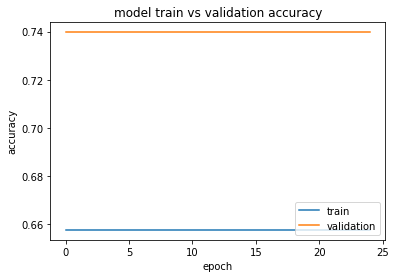

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile0
Classification Report for LSTM predictions:
-------------------------------------------


C:\Users\chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00       393
          1       0.74      1.00      0.85      1117

avg / total       0.55      0.74      0.63      1510

Fit LSTM Course FFF - 2 Target Classes - Decile1
Train on 3849 samples, validate on 1510 samples
Epoch 1/25
3849/3849 [==============================] - 15s 4ms/step - loss: 0.6244 - acc: 0.6607 - val_loss: 0.6534 - val_acc: 0.7139
Epoch 2/25
3849/3849 [==============================] - 12s 3ms/step - loss: 0.5963 - acc: 0.6882 - val_loss: 0.5562 - val_acc: 0.7166
Epoch 3/25
3849/3849 [==============================] - 12s 3ms/step - loss: 0.5878 - acc: 0.6911 - val_loss: 0.5522 - val_acc: 0.7166
Epoch 4/25
3849/3849 [==============================] - 13s 3ms/step - loss: 0.5827 - acc: 0.6950 - val_loss: 0.5550 - val_acc: 0.7185
Epoch 5/25
3849/3849 [==============================] - 12s 3ms/step - loss: 0.5805 - acc: 0.6942 - val_loss: 0.5250 - val_acc: 0.7225
Epoch 6/25
38

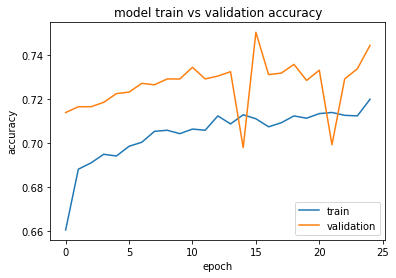

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile1
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.51      0.40      0.45       393
          1       0.80      0.87      0.83      1117

avg / total       0.73      0.74      0.73      1510

Fit LSTM Course FFF - 2 Target Classes - Decile2
Train on 3849 samples, validate on 1510 samples
Epoch 1/25
3849/3849 [==============================] - 17s 5ms/step - loss: 0.6110 - acc: 0.6784 - val_loss: 0.5050 - val_acc: 0.7709
Epoch 2/25
3849/3849 [==============================] - 14s 4ms/step - loss: 0.5406 - acc: 0.7360 - val_loss: 0.5248 - val_acc: 0.7212
Epoch 3/25
3849/3849 [==============================] - 15s 4ms/step - loss: 0.5210 - acc: 0.7423 - val_loss: 0.5237 - val_acc: 0.7285
Epoch 4/25
3849/3849 [==============================] - 16s 4ms/step - loss: 0.5122 - acc: 0.7506 - v

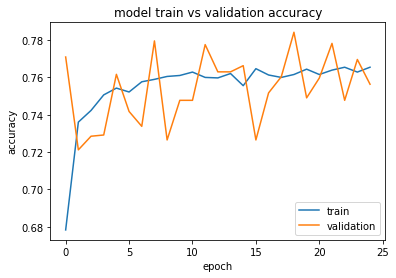

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile2
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.53      0.64      0.58       393
          1       0.86      0.80      0.83      1117

avg / total       0.77      0.76      0.76      1510

Fit LSTM Course FFF - 2 Target Classes - Decile3
Train on 3849 samples, validate on 1510 samples
Epoch 1/25
3849/3849 [==============================] - 20s 5ms/step - loss: 0.5936 - acc: 0.6913 - val_loss: 0.5251 - val_acc: 0.7609
Epoch 2/25
3849/3849 [==============================] - 17s 4ms/step - loss: 0.5090 - acc: 0.7511 - val_loss: 0.4411 - val_acc: 0.7967
Epoch 3/25
3849/3849 [==============================] - 17s 4ms/step - loss: 0.4961 - acc: 0.7563 - val_loss: 0.4290 - val_acc: 0.8020
Epoch 4/25
3849/3849 [==============================] - 17s 4ms/step - loss: 0.4886 - acc: 0.7646 - v

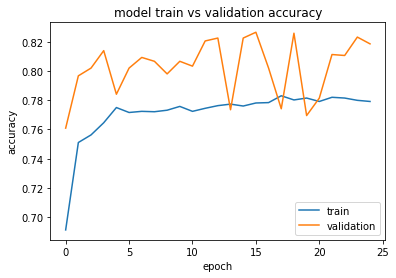

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile3
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.68      0.58      0.62       393
          1       0.86      0.90      0.88      1117

avg / total       0.81      0.82      0.81      1510

Fit LSTM Course FFF - 2 Target Classes - Decile4
Train on 3849 samples, validate on 1510 samples
Epoch 1/25
3849/3849 [==============================] - 21s 5ms/step - loss: 0.5942 - acc: 0.6900 - val_loss: 0.4429 - val_acc: 0.8007
Epoch 2/25
3849/3849 [==============================] - 20s 5ms/step - loss: 0.4919 - acc: 0.7558 - val_loss: 0.4126 - val_acc: 0.8126
Epoch 3/25
3849/3849 [==============================] - 20s 5ms/step - loss: 0.4756 - acc: 0.7724 - val_loss: 0.4074 - val_acc: 0.8066
Epoch 4/25
3849/3849 [==============================] - 17s 5ms/step - loss: 0.4703 - acc: 0.7773 - v

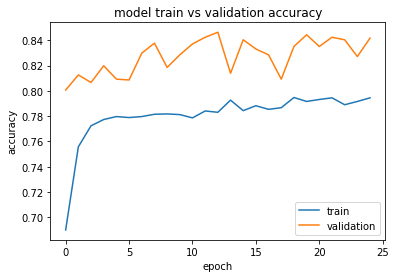

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile4
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.75      0.58      0.66       393
          1       0.86      0.93      0.90      1117

avg / total       0.84      0.84      0.83      1510

Fit LSTM Course FFF - 2 Target Classes - Decile5
Train on 3849 samples, validate on 1510 samples
Epoch 1/25
3849/3849 [==============================] - 25s 7ms/step - loss: 0.5662 - acc: 0.7098 - val_loss: 0.4184 - val_acc: 0.8205
Epoch 2/25
3849/3849 [==============================] - 21s 5ms/step - loss: 0.4646 - acc: 0.7784 - val_loss: 0.3898 - val_acc: 0.8219
Epoch 3/25
3849/3849 [==============================] - 20s 5ms/step - loss: 0.4503 - acc: 0.7862 - val_loss: 0.3800 - val_acc: 0.8265
Epoch 4/25
3849/3849 [==============================] - 27s 7ms/step - loss: 0.4426 - acc: 0.7948 - v

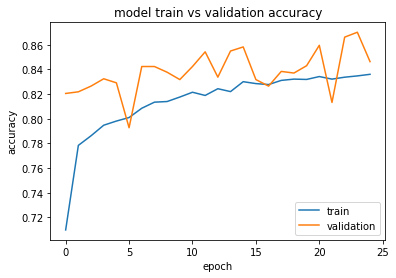

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile5
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.70      0.71      0.71       393
          1       0.90      0.90      0.90      1117

avg / total       0.85      0.85      0.85      1510

Fit LSTM Course FFF - 2 Target Classes - Decile6
Train on 3849 samples, validate on 1510 samples
Epoch 1/25
3849/3849 [==============================] - 24s 6ms/step - loss: 0.5437 - acc: 0.7256 - val_loss: 0.4515 - val_acc: 0.8000
Epoch 2/25
3849/3849 [==============================] - 19s 5ms/step - loss: 0.4281 - acc: 0.8044 - val_loss: 0.3505 - val_acc: 0.8477
Epoch 3/25
3849/3849 [==============================] - 19s 5ms/step - loss: 0.4100 - acc: 0.8179 - val_loss: 0.3436 - val_acc: 0.8497
Epoch 4/25
3849/3849 [==============================] - 19s 5ms/step - loss: 0.3981 - acc: 0.8301 - v

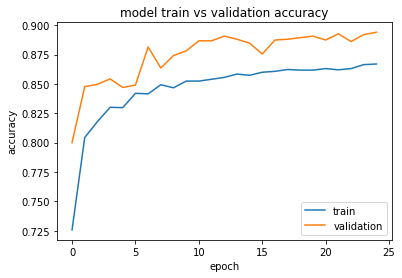

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile6
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.85      0.72      0.78       393
          1       0.91      0.96      0.93      1117

avg / total       0.89      0.89      0.89      1510

Fit LSTM Course FFF - 2 Target Classes - Decile7
Train on 3849 samples, validate on 1510 samples
Epoch 1/25
3849/3849 [==============================] - 31s 8ms/step - loss: 0.5539 - acc: 0.7145 - val_loss: 0.5190 - val_acc: 0.7510
Epoch 2/25
3849/3849 [==============================] - 25s 6ms/step - loss: 0.4258 - acc: 0.7971 - val_loss: 0.4379 - val_acc: 0.7894
Epoch 3/25
3849/3849 [==============================] - 25s 7ms/step - loss: 0.4072 - acc: 0.8155 - val_loss: 0.3688 - val_acc: 0.8391
Epoch 4/25
3849/3849 [==============================] - 25s 7ms/step - loss: 0.3931 - acc: 0.8293 - v

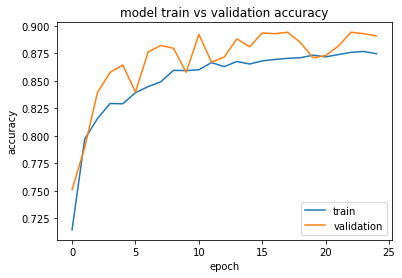

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile7
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.84      0.72      0.77       393
          1       0.90      0.95      0.93      1117

avg / total       0.89      0.89      0.89      1510

Fit LSTM Course FFF - 2 Target Classes - Decile8
Train on 3849 samples, validate on 1510 samples
Epoch 1/25
3849/3849 [==============================] - 28s 7ms/step - loss: 0.5164 - acc: 0.7441 - val_loss: 0.3505 - val_acc: 0.8437
Epoch 2/25
3849/3849 [==============================] - 24s 6ms/step - loss: 0.3806 - acc: 0.8311 - val_loss: 0.3368 - val_acc: 0.8510
Epoch 3/25
3849/3849 [==============================] - 26s 7ms/step - loss: 0.3652 - acc: 0.8449 - val_loss: 0.3611 - val_acc: 0.8397
Epoch 4/25
3849/3849 [==============================] - 23s 6ms/step - loss: 0.3526 - acc: 0.8496 - v

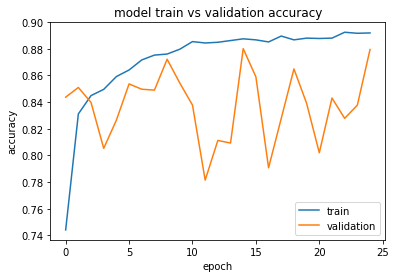

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile8
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.75      0.81      0.78       393
          1       0.93      0.90      0.92      1117

avg / total       0.88      0.88      0.88      1510

Fit LSTM Course FFF - 2 Target Classes - Decile9
Train on 3849 samples, validate on 1510 samples
Epoch 1/25
3849/3849 [==============================] - 34s 9ms/step - loss: 0.5186 - acc: 0.7353 - val_loss: 0.3225 - val_acc: 0.8649
Epoch 2/25
3849/3849 [==============================] - 28s 7ms/step - loss: 0.3728 - acc: 0.8283 - val_loss: 0.3170 - val_acc: 0.8596
Epoch 3/25
3849/3849 [==============================] - 28s 7ms/step - loss: 0.3543 - acc: 0.8420 - val_loss: 0.3240 - val_acc: 0.8556
Epoch 4/25
3849/3849 [==============================] - 28s 7ms/step - loss: 0.3435 - acc: 0.8545 - v

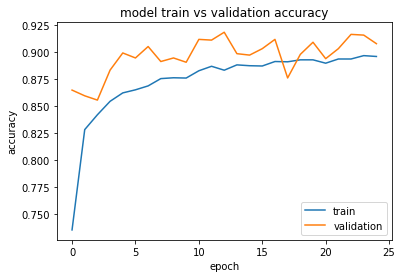

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile9
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.82      0.82      0.82       393
          1       0.94      0.94      0.94      1117

avg / total       0.91      0.91      0.91      1510

Fit LSTM Course FFF - 2 Target Classes - Decile10
Train on 3849 samples, validate on 1510 samples
Epoch 1/25
3849/3849 [==============================] - 33s 9ms/step - loss: 0.4737 - acc: 0.7628 - val_loss: 0.2752 - val_acc: 0.8934
Epoch 2/25
3849/3849 [==============================] - 30s 8ms/step - loss: 0.3136 - acc: 0.8683 - val_loss: 0.2371 - val_acc: 0.9132
Epoch 3/25
3849/3849 [==============================] - 30s 8ms/step - loss: 0.2929 - acc: 0.8828 - val_loss: 0.3394 - val_acc: 0.8576
Epoch 4/25
3849/3849 [==============================] - 30s 8ms/step - loss: 0.2859 - acc: 0.8904 - 

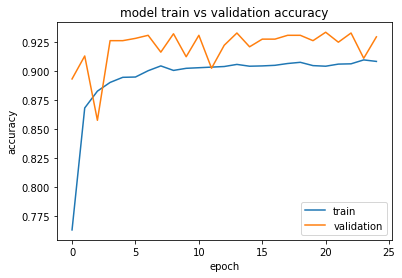

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile10
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.89      0.84      0.86       393
          1       0.94      0.96      0.95      1117

avg / total       0.93      0.93      0.93      1510



In [32]:
for i in Deciles:
    
    # Build model for each timestep

    FFF_model_names[i] = Sequential()
    FFF_model_names[i].add(LSTM(32, input_shape=(i+1,3) , activation='sigmoid'))
    FFF_model_names[i].add(Dense(1, activation='sigmoid'))
    FFF_model_names[i].compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    
    # Fit model for each timestep
    #ES = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto')
    print('Fit LSTM Course FFF - 2 Target Classes - Decile' + str(i))
    history = FFF_model_names[i].fit(FFF_Train_set[i], FFF_Train_Targets_1D, epochs=25, batch_size=1, verbose=1,
                                    validation_data = (FFF_Test_set[i], FFF_Test_Targets_1D))
    
    # plot train vs validation accuracy
    pyplot.plot(history.history['acc'])
    pyplot.plot(history.history['val_acc'])
    pyplot.title('model train vs validation accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'validation'], loc='lower right')
    pyplot.show()
    
    # Test model for each timestep
    print('-------------------------------------------')
    print('Test LSTM Course FFF - 2 Target Classes - Decile' + str(i))
    print('Classification Report for LSTM predictions:')
    print('-------------------------------------------')
    print(classification_report(y_pred=FFF_model_names[i].predict_classes(FFF_Test_set[i]), y_true=FFF_Test_Targets_1D))

# Alternative approach: model every timestep individually

# LSTM Course BBB

### Train LSTM Course BBB

In [21]:
model.fit(BBB_Train_3D, BBB_Train_Targets_1D, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
3978/3978 [==============================] - 16s 4ms/step - loss: 0.3135 - acc: 0.9065
Epoch 2/10
3978/3978 [==============================] - 16s 4ms/step - loss: 0.3023 - acc: 0.9062
Epoch 3/10
3978/3978 [==============================] - 16s 4ms/step - loss: 0.3006 - acc: 0.9035
Epoch 4/10
3978/3978 [==============================] - 16s 4ms/step - loss: 0.2924 - acc: 0.9045
Epoch 5/10
3978/3978 [==============================] - 16s 4ms/step - loss: 0.3021 - acc: 0.9032
Epoch 6/10
3978/3978 [==============================] - 16s 4ms/step - loss: 0.2943 - acc: 0.9035
Epoch 7/10
3978/3978 [==============================] - 16s 4ms/step - loss: 0.3018 - acc: 0.9052
Epoch 8/10
3978/3978 [==============================] - 15s 4ms/step - loss: 0.3028 - acc: 0.9037
Epoch 9/10
3978/3978 [==============================] - 16s 4ms/step - loss: 0.3052 - acc: 0.9025
Epoch 10/10
3978/3978 [==============================] - 15s 4ms/step - loss: 0.3040 - acc: 0.9055


### Test LSTM Course BBB

In [29]:
model.predict_classes(BBB_Test_3D)

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [30]:
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=model.predict_classes(BBB_Test_3D), y_true=BBB_Test_Targets_1D))

Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.55      0.92      0.69       391
          1       0.97      0.74      0.84      1152

avg / total       0.86      0.79      0.80      1543



# LSTM Course DDD

### Train LSTM Course DDD

In [32]:
model.predict_classes(DDD_Test_3D)

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

### Test LSTM Course DDD

In [31]:
model.fit(DDD_Train_3D, DDD_Train_Targets_1D, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
2866/2866 [==============================] - 18s 6ms/step - loss: 0.3181 - acc: 0.8876
Epoch 2/10
2866/2866 [==============================] - 17s 6ms/step - loss: 0.2974 - acc: 0.8901
Epoch 3/10
2866/2866 [==============================] - 17s 6ms/step - loss: 0.2928 - acc: 0.8985
Epoch 4/10
2866/2866 [==============================] - 18s 6ms/step - loss: 0.2941 - acc: 0.9002
Epoch 5/10
2866/2866 [==============================] - 15s 5ms/step - loss: 0.2792 - acc: 0.9013
Epoch 6/10
2866/2866 [==============================] - 16s 5ms/step - loss: 0.2808 - acc: 0.9033
Epoch 7/10
2866/2866 [==============================] - 15s 5ms/step - loss: 0.2690 - acc: 0.9047
Epoch 8/10
2866/2866 [==============================] - 15s 5ms/step - loss: 0.2657 - acc: 0.9030
Epoch 9/10
2866/2866 [==============================] - 16s 6ms/step - loss: 0.2628 - acc: 0.9027
Epoch 10/10
2866/2866 [==============================] - 16s 6ms/step - loss: 0.2584 - acc: 0.9107


In [33]:
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=model.predict_classes(DDD_Test_3D), y_true=DDD_Test_Targets_1D))

Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.89      0.71      0.79       364
          1       0.88      0.96      0.92       792

avg / total       0.88      0.88      0.88      1156



# LSTM Course FFF

### Train LSTM Course FFF

In [35]:
model.fit(FFF_Train_3D, FFF_Train_Targets_1D, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
3849/3849 [==============================] - 22s 6ms/step - loss: 0.2619 - acc: 0.9101
Epoch 2/10
3849/3849 [==============================] - 22s 6ms/step - loss: 0.2526 - acc: 0.9174
Epoch 3/10
3849/3849 [==============================] - 23s 6ms/step - loss: 0.2531 - acc: 0.9143
Epoch 4/10
3849/3849 [==============================] - 26s 7ms/step - loss: 0.2470 - acc: 0.9163
Epoch 5/10
3849/3849 [==============================] - 26s 7ms/step - loss: 0.2471 - acc: 0.9163
Epoch 6/10
3849/3849 [==============================] - 25s 7ms/step - loss: 0.2551 - acc: 0.9182
Epoch 7/10
3849/3849 [==============================] - 25s 6ms/step - loss: 0.2560 - acc: 0.9195
Epoch 8/10
3849/3849 [==============================] - 26s 7ms/step - loss: 0.2555 - acc: 0.9174
Epoch 9/10
3849/3849 [==============================] - 25s 7ms/step - loss: 0.2478 - acc: 0.9197
Epoch 10/10
3849/3849 [==============================] - 25s 7ms/step - loss: 0.2531 - acc: 0.9213


### Test LSTM Course FFF

In [36]:
model.predict_classes(FFF_Test_3D)

array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
    

In [37]:
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=model.predict_classes(FFF_Test_3D), y_true=FFF_Test_Targets_1D))

Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.83      0.87       393
          1       0.94      0.98      0.96      1117

avg / total       0.94      0.94      0.94      1510

